In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from russian_exports_functions import *

DATA PREPROCESSING

In [30]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
df = pd.read_csv("RUStoWorldTrade.csv", error_bad_lines = False, engine="python")
df.head(10)
print(df.nunique())
"""Dataset is large, so I will drop all rows with NAN as this shouldn't affect 
data processing."""
df.dropna(inplace = True)

index                1384603
Classification             1
Year                      14
Aggregate Level            6
Is Leaf Code               2
Reporter Code              1
Reporter                   1
Reporter ISO               1
Partner Code             225
Partner                  225
Partner ISO              222
Commodity Code          3979
Commodity               3938
Qty Unit Code             12
Qty Unit                  12
Qty                   250540
Netweight (kg)        286493
Trade Value (US$)     489315
dtype: int64


In [31]:
df.dtypes

index                  int64
Classification        object
Year                   int64
Aggregate Level        int64
Is Leaf Code           int64
Reporter Code          int64
Reporter              object
Reporter ISO          object
Partner Code           int64
Partner               object
Partner ISO           object
Commodity Code        object
Commodity             object
Qty Unit Code          int64
Qty Unit              object
Qty                  float64
Netweight (kg)       float64
Trade Value (US$)      int64
dtype: object

FEATURE ENGINEERING AND SELECTION

In [32]:
df = df.drop(['Classification','index','Partner Code',
'Partner ISO','Reporter Code','Reporter',
'Reporter ISO','Qty Unit Code', 'Qty Unit','Commodity','Commodity Code','Is Leaf Code'], axis = 1)
#Reduce project into data entries with a trade (Qty > 0) and EU countries 
df = df[(df['Qty'] > 0.0) & (df['Netweight (kg)'] > 0.0)]
EU_countries = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 
                'Cyprus', 'Czechia', 'Denmark', 'Estonia',
                'Finland', 'France', 'Germany', 'Greece',
                'Hungary', 'Ireland', 'Italy', 'Latvia',
                'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
                'Poland', 'Portugal', 'Romania', 'Slovakia', 
                'Slovenia', 'Spain', 'Sweden']
df = df[df['Partner'].isin(EU_countries)]
median_trade_value = df["Trade Value (US$)"].median()
x = df["Trade Value (US$)"]
df["Large trades"] = np.select([x < median_trade_value, x >= median_trade_value], [0,1])  
print(df)
print(df.nunique())

         Year  Aggregate Level  Partner        Qty  Netweight (kg)  \
45809    2007                3  Croatia  2941254.0       2941254.0   
45810    2007                3  Croatia    40000.0         40000.0   
45811    2007                3  Croatia   340000.0        340000.0   
45812    2007                3  Croatia   297553.0        297553.0   
45813    2007                3  Croatia  4016629.0       4016629.0   
...       ...              ...      ...        ...             ...   
1364235  2020                3   Cyprus        7.0             7.0   
1364238  2020                3   Cyprus    50086.0         50086.0   
1364239  2020                3   Cyprus    75091.0         75091.0   
1364243  2020                3   Cyprus        3.0             3.0   
1364244  2020                3   Cyprus       43.0           193.0   

         Trade Value (US$)  Large trades  
45809               791197             1  
45810                23200             0  
45811               185194    

In [33]:
df.head(5)

,Year,Aggregate Level,Partner,Qty,Netweight (kg),Trade Value (US$),Large trades
45809,2007,3,Croatia,2941254.0,2941254.0,791197,1
45810,2007,3,Croatia,40000.0,40000.0,23200,0
45811,2007,3,Croatia,340000.0,340000.0,185194,1
45812,2007,3,Croatia,297553.0,297553.0,226153,1
45813,2007,3,Croatia,4016629.0,4016629.0,752751,1


In [34]:
df['Qty'].equals(df['Netweight (kg)'])

False

In [35]:
df['Partner'].value_counts()

Germany        29349
Latvia         26222
Lithuania      25323
Poland         22361
Czechia        18195
France         17597
Estonia        17538
Netherlands    16935
Finland        16935
Bulgaria       16917
Spain          14289
Italy          12343
Romania        12283
Slovakia       11426
Sweden         10350
Austria        10160
Hungary         9658
Greece          9366
Denmark         7821
Cyprus          7554
Belgium         6745
Croatia         5407
Slovenia        5153
Portugal        4159
Ireland         3495
Luxembourg      1658
Malta           1545
Name: Partner, dtype: int64

In [36]:
df.describe()

,Year,Aggregate Level,Qty,Netweight (kg),Trade Value (US$),Large trades
count,340784.000000,340784.000000,3.407840e+05,3.407840e+05,3.407840e+05,340784.000000
mean,2013.754449,4.400990,2.846374e+07,2.899125e+07,1.343218e+07,0.500000
std,4.082690,0.700699,6.470568e+08,6.483411e+08,3.464109e+08,0.500001
min,2007.000000,3.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000
25%,2010.000000,4.000000,4.400000e+01,1.060000e+02,3.669000e+03,0.000000
50%,2014.000000,5.000000,1.683500e+03,3.339000e+03,3.884650e+04,0.500000
75%,2017.000000,5.000000,8.746325e+04,1.158120e+05,3.905920e+05,1.000000
max,2020.000000,5.000000,5.691917e+10,5.691917e+10,3.998432e+10,1.000000


In [37]:
df["Large trades"].value_counts()

1    170392
0    170392
Name: Large trades, dtype: int64

VISUALISING THE TRADE CHANGES OVER THESE PERIODS

[['Austria', 0.008902618531313343], ['Belgium', 0.016102598833088056], ['Bulgaria', 0.021489617741334326], ['Croatia', 0.006715657469929249], ['Cyprus', 0.03448922129973493], ['Czechia', 0.019897205786500224], ['Denmark', 0.009274786682649404], ['Estonia', 0.010811452132080528], ['Finland', 0.07104758343764017], ['France', 0.037641454525974054], ['Germany', 0.11876967966284233], ['Greece', 0.012579355162661782], ['Hungary', 0.017786582680821346], ['Ireland', 0.00413178594300912], ['Italy', 0.07975239338581878], ['Latvia', 0.015783134268677373], ['Lithuania', 0.022131524297888356], ['Luxembourg', 0.0009902258540286043], ['Malta', 0.0032734974066133305], ['Netherlands', 0.3031578561237765], ['Poland', 0.07919048409645583], ['Portugal', 0.013184753403551788], ['Romania', 0.015357645304520069], ['Slovakia', 0.02502803606190018], ['Slovenia', 0.0010597488887564986], ['Spain', 0.030857306785411022], ['Sweden', 0.020593794233022773]]
[['Austria', 0.001361113057982235], ['Belgium', 0.025314908

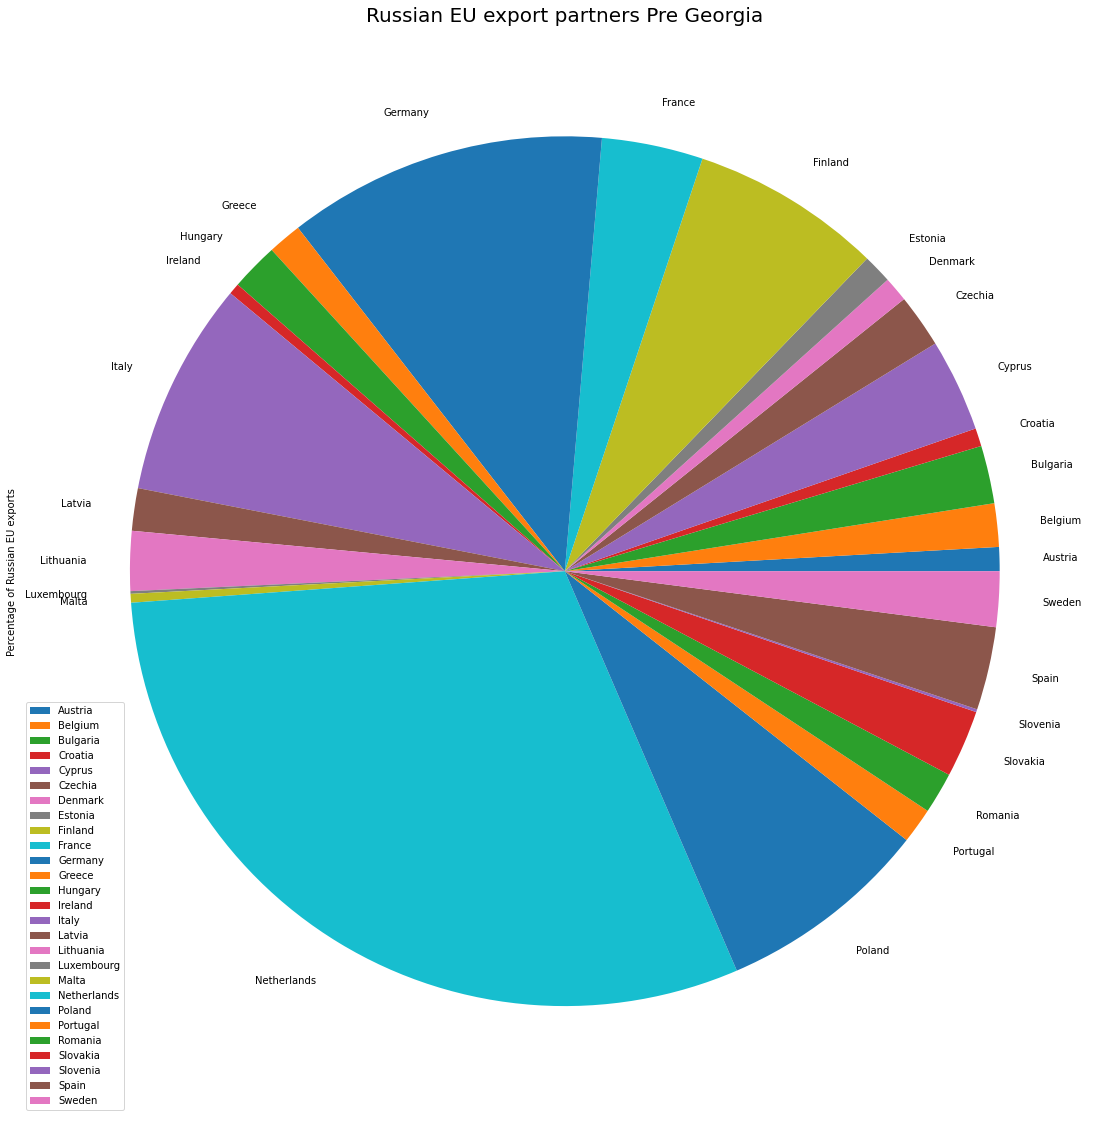

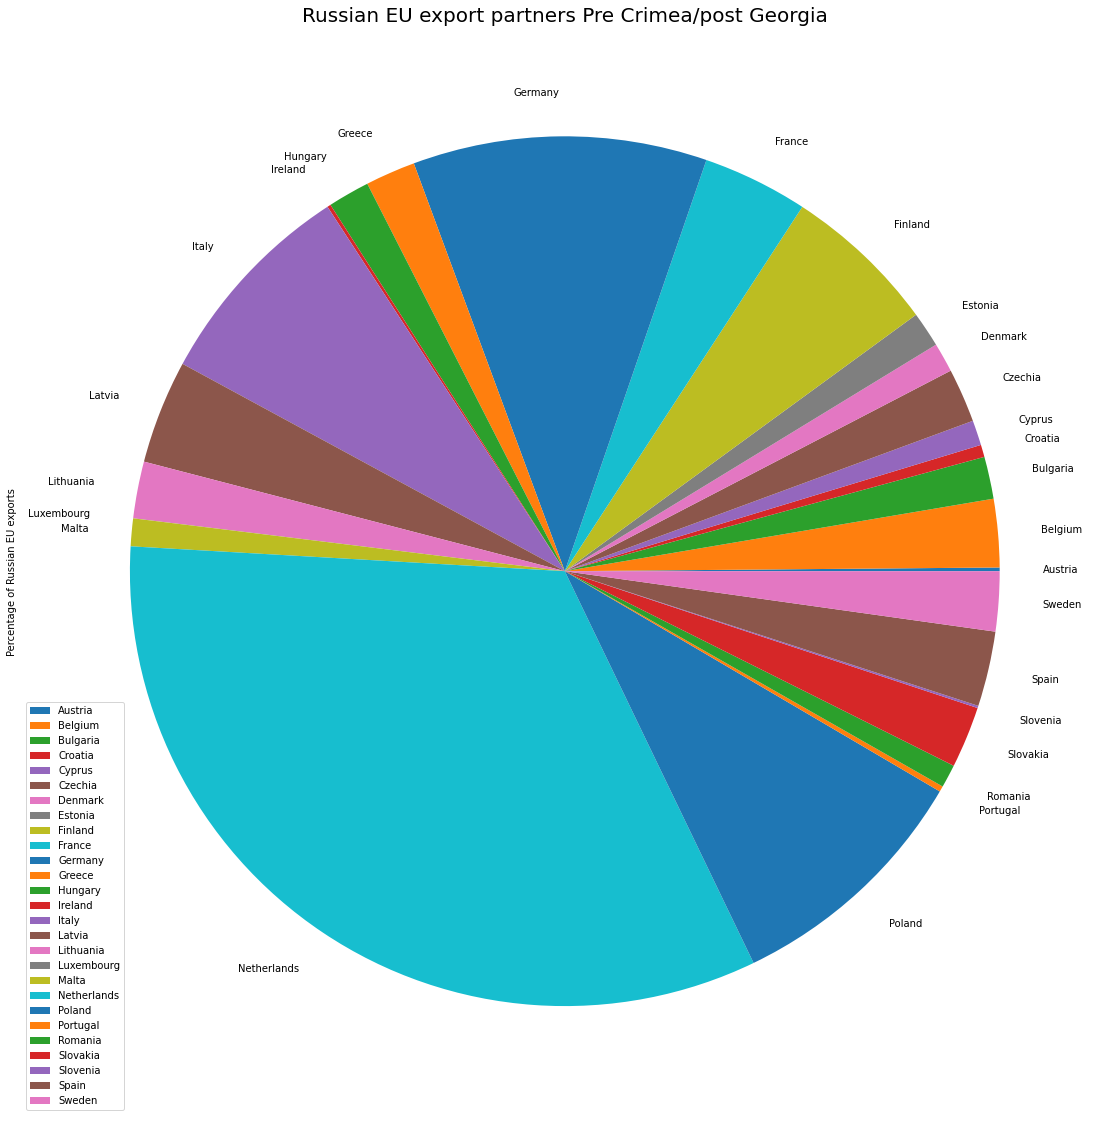

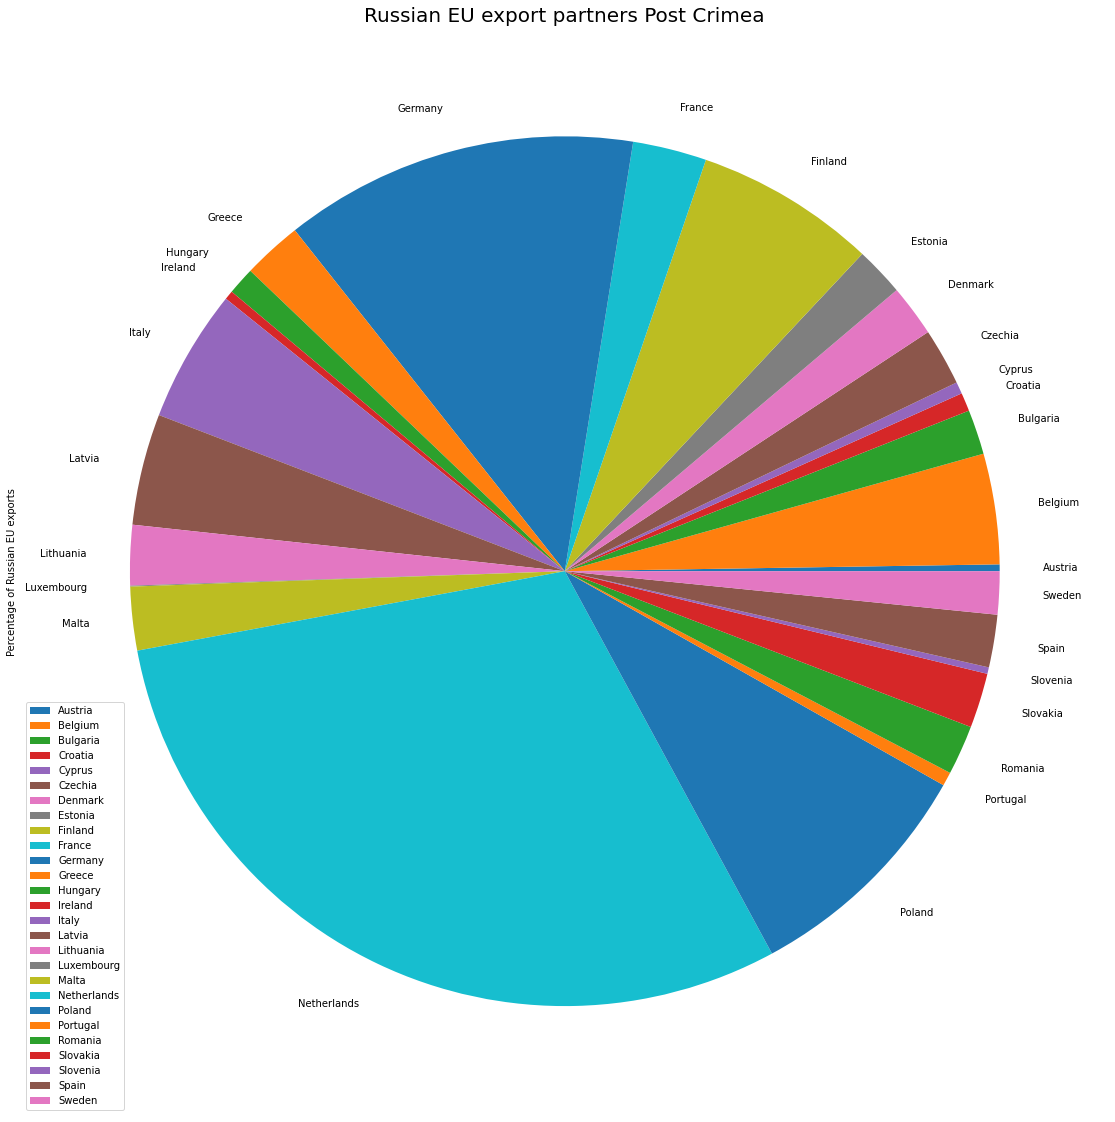

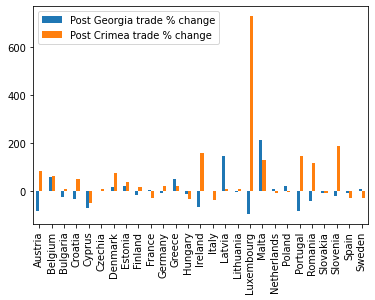

In [38]:
#Find the amount traded in exports with each country
pre_georgia_dataset = df[df['Year'] == 2007]

post_georgia_dataset = df[(df['Year'] >= 2009) 
                                        & (df['Year'] <= 2013)]
post_crimea_dataset = df[df['Year'] >= 2015]

#Displaying findings from the data over these two time periods
phase1 = eu_export_information(pre_georgia_dataset
                    , EU_countries, 'Pre Georgia')

phase2 = eu_export_information(post_georgia_dataset
                    , EU_countries, 'Pre Crimea/post Georgia')

phase3 = eu_export_information(post_crimea_dataset
                    , EU_countries, 'Post Crimea')
eu_export_changes(phase3, phase2, phase1, EU_countries)

In [39]:
pre_georgia_dataset['Large trades'].value_counts()

1    12136
0    11771
Name: Large trades, dtype: int64

In [40]:
post_georgia_dataset['Large trades'].value_counts()

1    57214
0    54854
Name: Large trades, dtype: int64

In [41]:
post_crimea_dataset['Large trades'].value_counts()

0    80752
1    76881
Name: Large trades, dtype: int64

WILL DROP TRADE VALUE (US$) IN ALL THREE DATASETS IN ORDER TO MAKE TRADE CLASSIFICATION PREDICTIONS ACCURATELY 

In [42]:
pre_georgia_dataset.head(5)

,Year,Aggregate Level,Partner,Qty,Netweight (kg),Trade Value (US$),Large trades
45809,2007,3,Croatia,2941254.0,2941254.0,791197,1
45810,2007,3,Croatia,40000.0,40000.0,23200,0
45811,2007,3,Croatia,340000.0,340000.0,185194,1
45812,2007,3,Croatia,297553.0,297553.0,226153,1
45813,2007,3,Croatia,4016629.0,4016629.0,752751,1


In [43]:
pre_georgia_dataset = pre_georgia_dataset.drop(['Trade Value (US$)'], axis = 1)

In [44]:
pre_georgia_dataset.head(5)

,Year,Aggregate Level,Partner,Qty,Netweight (kg),Large trades
45809,2007,3,Croatia,2941254.0,2941254.0,1
45810,2007,3,Croatia,40000.0,40000.0,0
45811,2007,3,Croatia,340000.0,340000.0,1
45812,2007,3,Croatia,297553.0,297553.0,1
45813,2007,3,Croatia,4016629.0,4016629.0,1


In [45]:
post_georgia_dataset.head(5)

,Year,Aggregate Level,Partner,Qty,Netweight (kg),Trade Value (US$),Large trades
45959,2009,3,Croatia,208832.0,208832.0,155547,1
45960,2009,3,Croatia,11069.0,11069.0,56733,1
45961,2009,3,Croatia,17237.0,17237.0,120956,1
45962,2009,3,Croatia,809.0,529210.0,208901,1
45963,2009,3,Croatia,16.0,16.0,116,0


In [46]:
post_georgia_dataset = post_georgia_dataset.drop(['Trade Value (US$)'], axis = 1)

In [47]:
post_georgia_dataset.head(5)

,Year,Aggregate Level,Partner,Qty,Netweight (kg),Large trades
45959,2009,3,Croatia,208832.0,208832.0,1
45960,2009,3,Croatia,11069.0,11069.0,1
45961,2009,3,Croatia,17237.0,17237.0,1
45962,2009,3,Croatia,809.0,529210.0,1
45963,2009,3,Croatia,16.0,16.0,0


In [48]:
post_crimea_dataset.head(5)

,Year,Aggregate Level,Partner,Qty,Netweight (kg),Trade Value (US$),Large trades
46492,2015,3,Croatia,273000.0,273000.0,193176,1
46493,2015,3,Croatia,12411089.0,12411089.0,5002408,1
46494,2015,3,Croatia,80000.0,80000.0,15539,0
46495,2015,3,Croatia,600.0,610.0,204,0
46496,2015,3,Croatia,3548.0,19228.0,25206,0


In [49]:
post_crimea_dataset = post_crimea_dataset.drop(['Trade Value (US$)'], axis = 1)

In [50]:
post_crimea_dataset.head(5)

,Year,Aggregate Level,Partner,Qty,Netweight (kg),Large trades
46492,2015,3,Croatia,273000.0,273000.0,1
46493,2015,3,Croatia,12411089.0,12411089.0,1
46494,2015,3,Croatia,80000.0,80000.0,0
46495,2015,3,Croatia,600.0,610.0,0
46496,2015,3,Croatia,3548.0,19228.0,0


TRADE CLASSIFICATION PREDICTIONS

[[2007 3 'Croatia' 2941254.0 2941254.0]
 [2007 3 'Croatia' 40000.0 40000.0]
 [2007 3 'Croatia' 340000.0 340000.0]
 ...
 [2007 3 'Cyprus' 11.0 11.0]
 [2007 3 'Cyprus' 3.0 3.0]
 [2007 3 'Cyprus' 3513.0 210.0]]
XGBoost Classification Accuracy is: 84.98 %
K-Fold-Cross-Validation Accuracy is: 85.95 %
K-Fold-Cross-Validation Standard Deviation is: 0.57 %


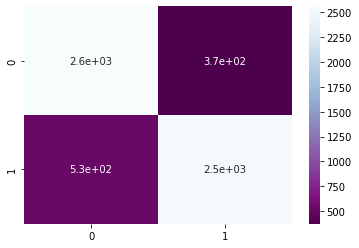

In [51]:
model_accuracy_trades(pre_georgia_dataset)

In [52]:
post_georgia_dataset['Large trades'].value_counts()

1    57214
0    54854
Name: Large trades, dtype: int64

[[2009 3 'Croatia' 208832.0 208832.0]
 [2009 3 'Croatia' 11069.0 11069.0]
 [2009 3 'Croatia' 17237.0 17237.0]
 ...
 [2013 3 'Cyprus' 21.0 21.0]
 [2013 3 'Cyprus' 3.0 3.0]
 [2013 3 'Cyprus' 99052.0 253.0]]
XGBoost Classification Accuracy is: 85.32 %
K-Fold-Cross-Validation Accuracy is: 84.96 %
K-Fold-Cross-Validation Standard Deviation is: 0.40 %


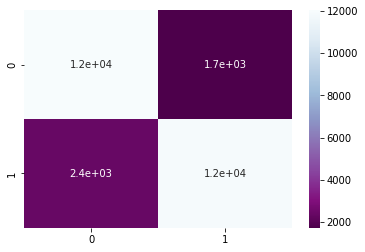

In [53]:
model_accuracy_trades(post_georgia_dataset)

In [54]:
post_crimea_dataset['Large trades'].value_counts()

0    80752
1    76881
Name: Large trades, dtype: int64

[[2015 3 'Croatia' 273000.0 273000.0]
 [2015 3 'Croatia' 12411089.0 12411089.0]
 [2015 3 'Croatia' 80000.0 80000.0]
 ...
 [2018 5 'Denmark' 175.0 541.0]
 [2020 5 'Denmark' 181.0 4.0]
 [2020 5 'Denmark' 64.0 64.0]]
XGBoost Classification Accuracy is: 87.52 %
K-Fold-Cross-Validation Accuracy is: 85.81 %
K-Fold-Cross-Validation Standard Deviation is: 0.99 %


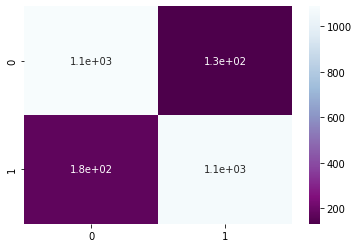

In [28]:
model_accuracy_trades(post_crimea_dataset)